In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv('covid.csv')

In [3]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
print(f"the total records in dataset are {df.shape[0]} and unique patients information is {df['id'].nunique()}")

the total records in dataset are 566602 and unique patients information is 563201


In [6]:
df['sex']=df['sex'].map({1:1,2:0})##1->male and 0->female

Text(0.5, 1.0, 'freq of male and female records')

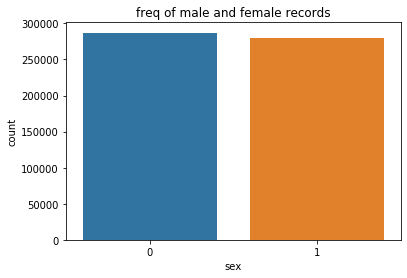

In [7]:
sn.countplot(df['sex'],)
plt.title('freq of male and female records')

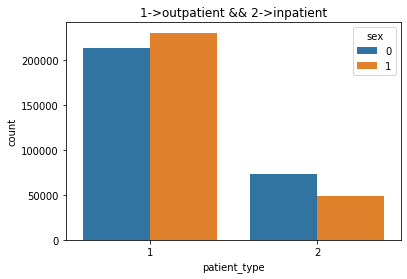

In [8]:
sn.countplot(df['patient_type'],hue=df['sex'])
plt.title('1->outpatient && 2->inpatient')
plt.show()

In [9]:
df['entry_date']=pd.to_datetime(df['entry_date'])

In [10]:
df['date_symptoms']=pd.to_datetime(df['date_symptoms'])


In [11]:
df['entry_day_symp']=df.apply(lambda x: 1 if x['entry_date']==x['date_symptoms'] else 0,axis=1)

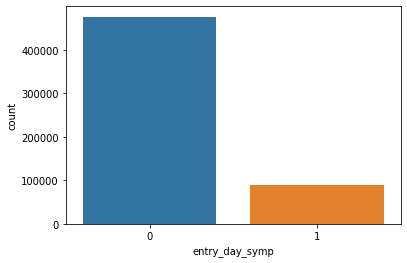

In [12]:
sn.countplot(df['entry_day_symp'])

In [13]:
##died_date having many null values which are represented as 9999...
#so,I get the month and date if they die,else 99 in month and date
df['month_died']=df['date_died'].apply(lambda x: x.split('-')[1] if x.split('-')[0]!='9999' else '99')
df['day_died']=df['date_died'].apply(lambda x: x.split('-')[0] if x.split('-')[0]!='9999' else '99')

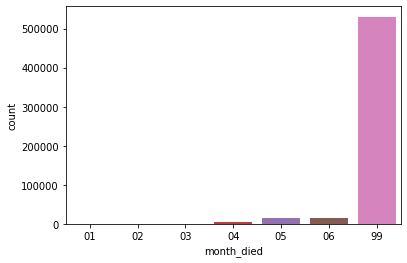

In [14]:
sn.countplot(df['month_died'])

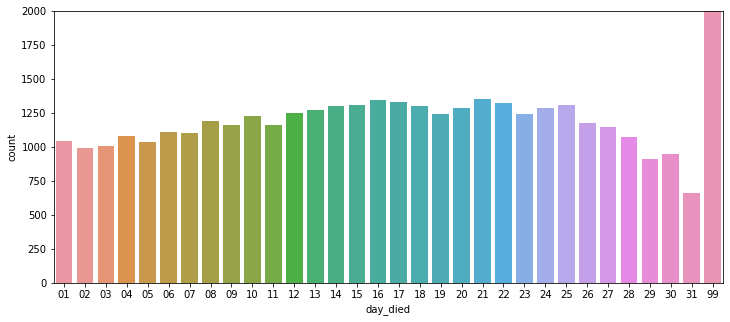

In [15]:
plt.figure(figsize=(12,5))
sn.countplot(df['day_died'])
plt.ylim(0,2000)
plt.show()

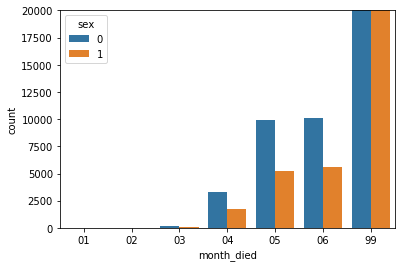

In [16]:
sn.countplot(df['month_died'],hue=df['sex'])
plt.ylim(0,20000)
plt.show()

we can see that females are dying more than males

Text(0.5, 1.0, '1-> Yes , 2-> No , others-> missing')

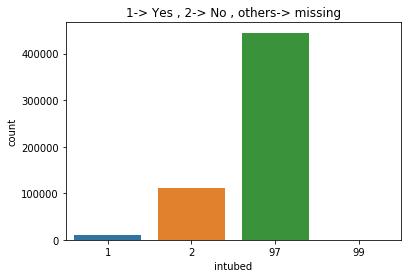

In [17]:
sn.countplot(df['intubed'])
plt.title('1-> Yes , 2-> No , others-> missing')

In [18]:
df['pneumonia']=df['pneumonia'].map({1:1,2:0,97:97,98:98,99:99})


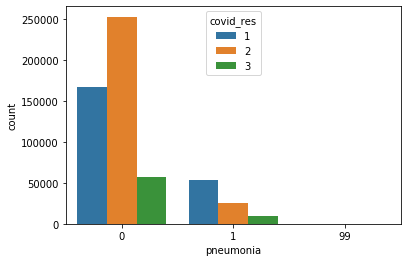

In [19]:
df['died']=df['date_died'].apply(lambda x: 1 if x.split('-')[0]!='9999' else 0)
sn.countplot(df['pneumonia'],hue=df['covid_res'])

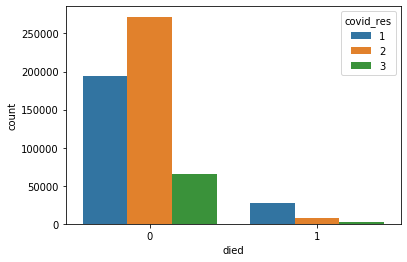

In [20]:
sn.countplot(df['died'],hue=df['covid_res'])

we can see some people who died they got negative result of having corona and some didnot get the results.

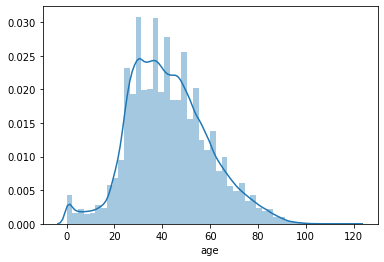

In [21]:
sn.distplot(df['age'])

the data is taken from newly born children to old age people

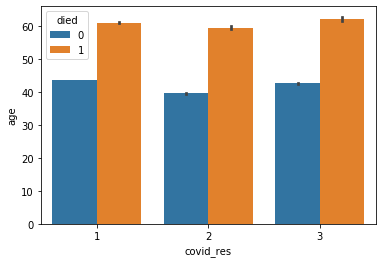

In [22]:
sn.barplot(df['covid_res'],df['age'],hue=df['died'])

In [23]:
##considered missing values as no pregency
##1->pregency others->no
df['pregency_or_not']=df['pregnancy'].apply(lambda x: 1 if x==1 else 0)
df.drop('pregnancy',axis=1,inplace=True)

Text(0.5, 0, 'pregnant')

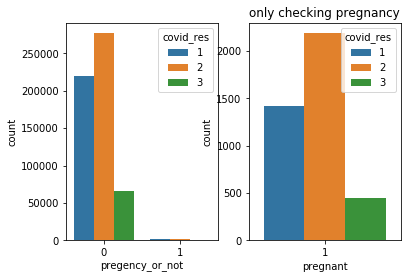

In [24]:
plt.subplots(1,2)
plt.subplot(1,2,1)
sn.countplot(df['pregency_or_not'],hue=df['covid_res'])
plt.subplot(1,2,2)
sn.countplot(df[df['pregency_or_not']==1]['pregency_or_not'],hue=df['covid_res'])
plt.title('only checking pregnancy')
plt.xlabel('pregnant')


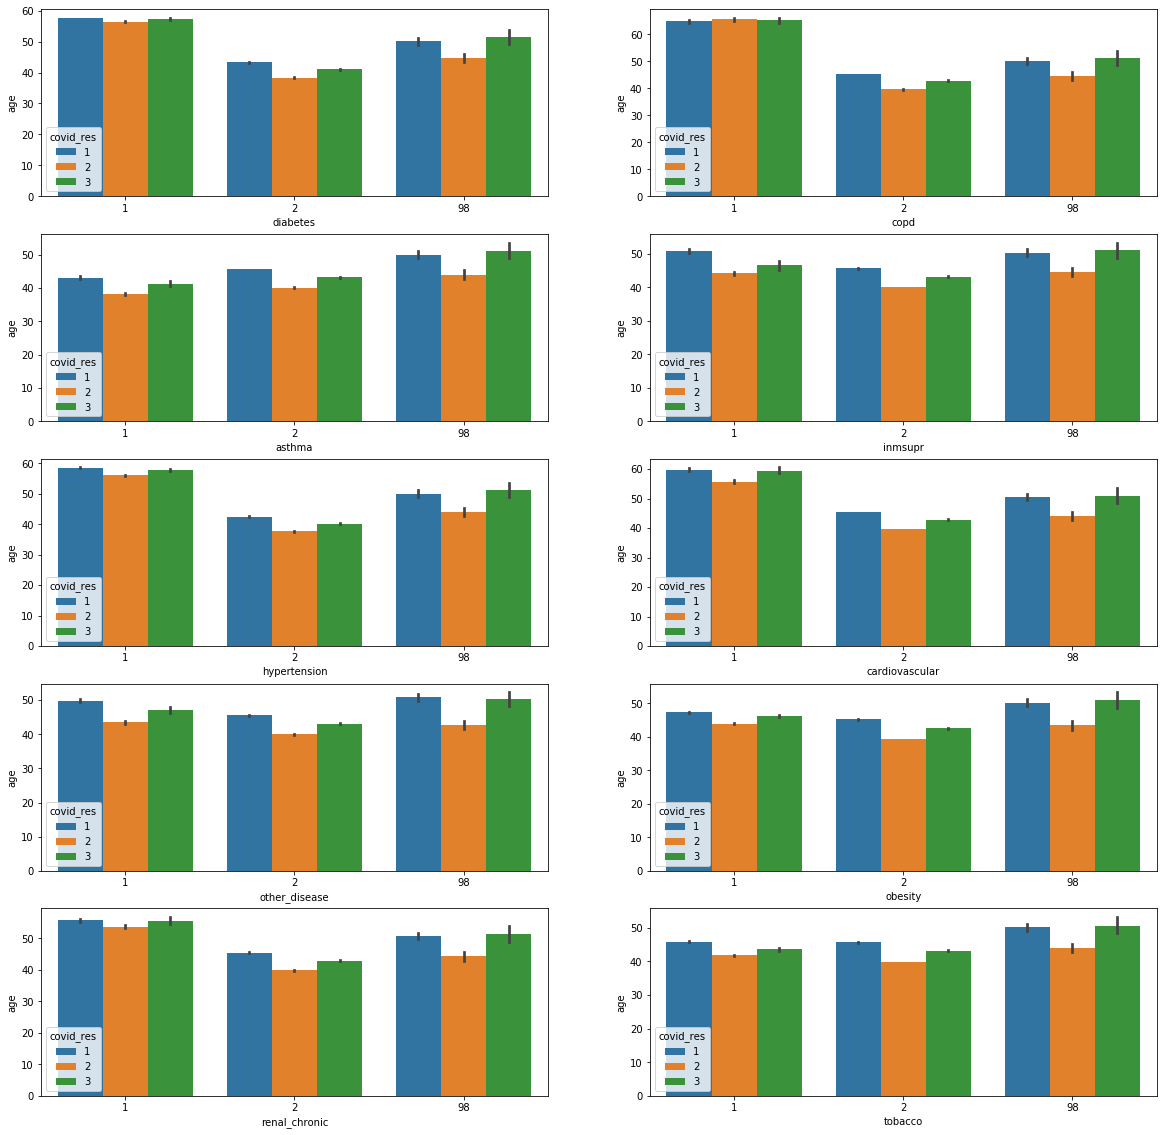

In [25]:
plt.subplots(5,2,figsize=(20,20))
plt.subplot(5,2,1)
sn.barplot(df['diabetes'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,2)
sn.barplot(df['copd'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,3)
sn.barplot(df['asthma'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,4)
sn.barplot(df['inmsupr'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,5)
sn.barplot(df['hypertension'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,6)
sn.barplot(df['cardiovascular'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,7)
sn.barplot(df['other_disease'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,8)
sn.barplot(df['obesity'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,9)
sn.barplot(df['renal_chronic'],df['age'],hue=df['covid_res'])
plt.subplot(5,2,10)
sn.barplot(df['tobacco'],df['age'],hue=df['covid_res'])

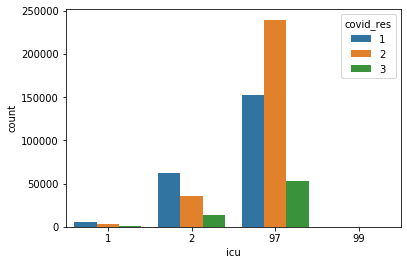

In [26]:
sn.countplot(df['icu'],hue=df['covid_res'])